In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from scipy.io import loadmat
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
default_img_set()


In [3]:
with open('FigS1.pkl', 'rb') as f:
    Metrics = pickle.load(f)
Tuning_Previous_Pre = Metrics["Tuning_Previous_Pre"]
Tuning_Previous_Post = Metrics["Tuning_Previous_Post"]
FanoFactor_Previous = Metrics["FanoFactor_Previous"]
NoiseCorrelation_Previous = Metrics["NoiseCorrelation_Previous"]

In [4]:
with open('../Results/FF_NC_curve.pkl', 'rb') as f:
    Metrics = pickle.load(f)
with open('../Results/Orientation_Tuning.pkl', 'rb') as f:
    Metrics2 = pickle.load(f)

In [6]:
Tuning_Compare_Pre_All_fit_mean = np.array(Metrics2['Tuning_Pre']).mean(axis=1)[:,0,-1,:]
Tuning_Compare_Pre_All_fit_se = sem(np.array(Metrics2['Tuning_Pre']), axis=1)[:,0,-1,:]
Tuning_Compare_Post_All_fit_mean = np.array(Metrics2['Tuning_Post']).mean(axis=1)[:,0,-1,:]
Tuning_Compare_Post_All_fit_se = sem(np.array(Metrics2['Tuning_Post']), axis=1)[:,0,-1,:]

FanoFactor_Curve_median_mean = Metrics['FF_curve'].mean(axis=(1,5))[:,:,0,-1]
FanoFactor_Curve_median_se = sem(Metrics['FF_curve'].mean(axis=(5)), axis=1)[:,:,0,-1]
NoiseCorrelation_Curve_median_mean = Metrics['NC_curve'].mean(axis=(1,5))[:,:,0,-1]
NoiseCorrelation_Curve_median_se = sem(Metrics['NC_curve'].mean(axis=(5)), axis=1)[:,:,0,-1]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


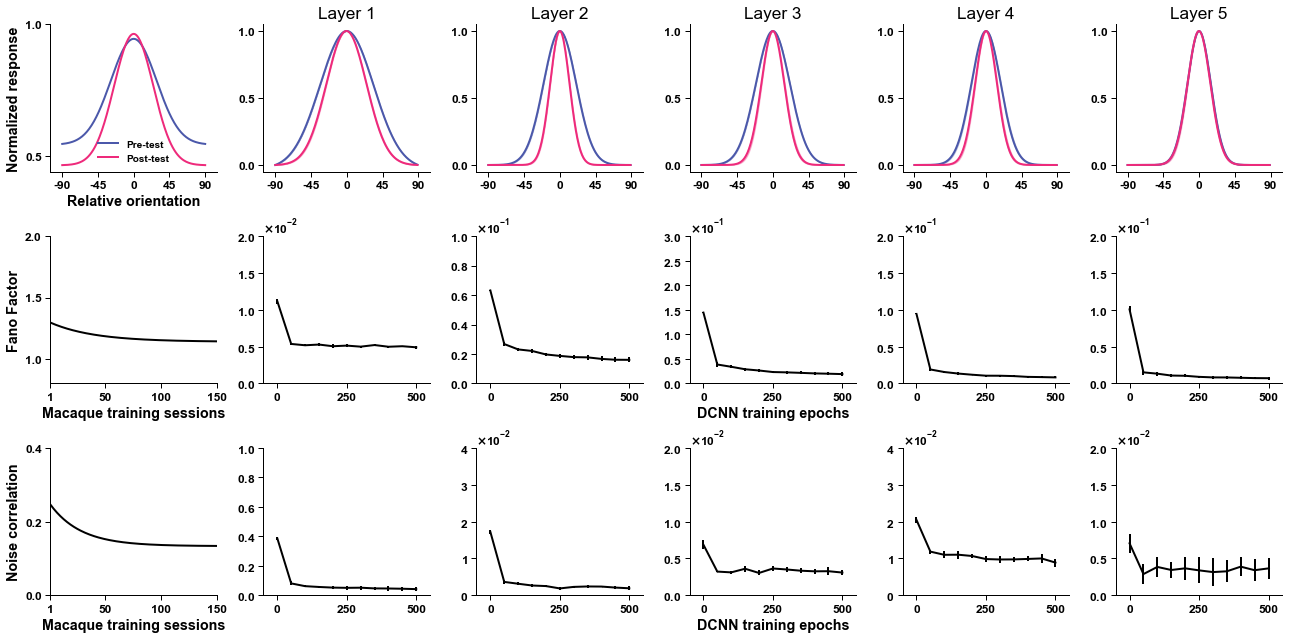

In [8]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

fig, ax = plt.subplots(3, 6, figsize=(18, 9))
plt.sca(ax[0,0])
ax[0,0].plot(np.arange(0,181,1), Tuning_Previous_Pre, label='Pre-test', c=ryzcolor(0))
ax[0,0].plot(np.arange(0,181,1), Tuning_Previous_Post, label='Post-test', c=ryzcolor(1))
#ax[0,0].set_title("Yang et al, J Neurosci, 2004")
ax[0,0].set_xlim([-15,195])
ax[0,0].set_xticks([0,45,90,135,180])
ax[0,0].set_yticks([0.5,1.0])
ax[0,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[0,0].set_xticklabels(['-90','-45','0','45','90'])
ax[0,0].set_ylabel("Normalized response")
ax[0,0].set_xlabel("Relative orientation")
ax[0,0].legend()

for i in range(1,6,1):
    plt.sca(ax[0,i])
    ax[0,i].plot(np.arange(0,180,1), Tuning_Compare_Pre_All_fit_mean[i-1], label=['Pre-test'],c=ryzcolor(0))
    ax[0,i].fill_between(np.arange(0,180,1),Tuning_Compare_Pre_All_fit_mean[i-1]-Tuning_Compare_Pre_All_fit_se[i-1],
                        Tuning_Compare_Pre_All_fit_mean[i-1]+Tuning_Compare_Pre_All_fit_se[i-1], color=C0_alpha)
    ax[0,i].plot(np.arange(0,180,1), Tuning_Compare_Post_All_fit_mean[i-1], label=['Post-test'],c=ryzcolor(1))
    ax[0,i].fill_between(np.arange(0,180,1),Tuning_Compare_Post_All_fit_mean[i-1]-Tuning_Compare_Post_All_fit_se[i-1],
                        Tuning_Compare_Post_All_fit_mean[i-1]+Tuning_Compare_Post_All_fit_se[i-1], color=C1_alpha)
    ax[0,i].set_title("Layer "+str(i))
    ax[0,i].set_xlim([-15,195])
    ax[0,i].set_xticks([0,45,90,135,180])
    ax[0,i].set_yticks([0,0.5,1.0])
    ax[0,i].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax[0,i].set_xticklabels(['-90','-45','0','45','90']);
    
plt.sca(ax[1,0])
ax[1,0].plot(np.arange(1, 151,1), FanoFactor_Previous, color='k')
#ax[1,0].set_title("Ni et al, Science, 2018")
ax[1,0].set_xlim([1,150]);
ax[1,0].set_xticks([1,50,100,150]);
ax[1,0].set_yticks([1,1.5,2.0])
ax[1,0].set_ylim([0.8,2.0])
ax[1,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[1,0].set_ylabel("Fano Factor")
ax[1,0].set_xlabel("Macaque training sessions")


## Fano factor
for i in range(1,6,1):
    plt.sca(ax[1,i])
    plot(np.arange(0,550,50), FanoFactor_Curve_median_mean[i-1], 
         yerr=FanoFactor_Curve_median_se[i-1], fmt='-o', color='k', ms=0.1)
    ax[1,i].set_xticks([0,250,500])
    ax[1,i].set_xlim([-50,550])
    ax[1,i].set_yscale('linear')
    ax[1,i].ticklabel_format(axis='y', scilimits=[0, 0], useMathText=True)
ax[1, 1].set_ylim([0, 2e-2])
ax[1, 2].set_ylim([0, 10e-2])
ax[1, 3].set_ylim([0, 3e-1])
ax[1, 4].set_ylim([0, 2e-1])
ax[1, 5].set_ylim([0, 2e-1])
ax[1, 3].set_xlabel('DCNN training epochs')


## Noise correlations
plt.sca(ax[2,0])
ax[2,0].plot(np.arange(1,151,1), NoiseCorrelation_Previous, color='k', ms=0.1)
#ax[2,0].set_title("Ni et al, Science, 2018")
ax[2,0].set_xlim([1,150])
ax[2,0].set_xticks([1,50,100,150])
ax[2,0].set_yticks([0, 0.2, 0.4])
ax[2,0].set_ylim([0, 0.4])
ax[2,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[2,0].set_ylabel("Noise correlation")
ax[2,0].set_xlabel("Macaque training sessions")
for i in range(1,6,1):
    plt.sca(ax[2, i])
    plot(np.arange(0,550,50), NoiseCorrelation_Curve_median_mean[i-1], 
         yerr=NoiseCorrelation_Curve_median_se[i-1], fmt='-o', color='k', ms=0.1)
    ax[2,i].set_xticks([0,250,500])
    ax[2,i].set_xlim([-50,550])
    ax[2,i].set_yscale('linear')
    ax[2,i].ticklabel_format(axis='y', scilimits=[0, 0], useMathText=True)

ax[2, 1].set_ylim([0, 1])
ax[2, 2].set_ylim([0, 0.04])
ax[2, 3].set_ylim([0, 0.02])
ax[2, 4].set_ylim([0, 0.04])
ax[2, 5].set_ylim([0, 0.02])
ax[2, 3].set_xlabel('DCNN training epochs')

plt.savefig('FigS1.pdf')